<a href="https://colab.research.google.com/github/pavi-1994/Cardio_vascular_risk_prediction/blob/main/cardivascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

## Data description:

#### Demographic:
• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

#### Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

#### Medical(current):

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)


#### Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [106]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# to handle missing values for continuous value
from sklearn.impute import KNNImputer
#for categorical value
from sklearn.impute import SimpleImputer


#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
#train_test_split
from sklearn.model_selection import train_test_split
#scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#to deal with imbalanced data
from imblearn.over_sampling import SMOTE

#logistic regression
from sklearn.linear_model import LogisticRegression

#evaluation techiniques
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,precision_score, classification_report
from sklearn.metrics import make_scorer, recall_score, f1_score, roc_auc_score,auc





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path="/content/drive/MyDrive/almabetter/module 4/capstone_project_3/data_cardiovascular_risk.csv"

### Importing

In [4]:
#importing data 
cardio_df=pd.read_csv(file_path)
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#print tail of dataframe
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#shape of data
cardio_df.shape

(3390, 17)

In [7]:
#printing the columns
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#using info
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
#check the datatypes of columns present in the cardio_df
print(f'Feature datatype of cardio_df :\n\n {cardio_df.dtypes}')

Feature datatype of cardio_df :

 id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [10]:
#checking full information of data
cardio_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [11]:
#check no of unique element present in each feature (columns)
cardio_df.nunique()


id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

### Missing values

In [12]:
#checking for null value 
print('Missing Data Count')
print(cardio_df.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(f'{round(cardio_df.isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2)}%')

Missing Data Count
glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose            8.97
education          2.57
BPMeds             1.30
totChol            1.12
cigsPerDay         0.65
BMI                0.41
heartRate          0.03
id                 0.00
diaBP              0.00
sysBP              0.00
prevalentHyp       0.00
diabetes           0.00
age                0.00
prevalentStroke    0.00
is_smoking         0.00
sex                0.00
TenYearCHD         0.00
dtype: float64%


### here we are observing prescence of missing value in percentage wise as we listed in descending order glucose, education, BPMeds, totChol, cigsPerDay, BMI, Heartrate. Handling the missing values are most important.

Before dealing with missing value we will convert categorical into numerical i.e by label encoding

In [13]:
# Replacing string categorical value with numerical value 0 or 1

cardio_df['sex'] = cardio_df['sex'].replace({'F':1,'M':0})
cardio_df['is_smoking'] = cardio_df['is_smoking'].replace({'YES':1,'NO':0})

## Create a list of categorical and continuous features:
    

In [14]:
# Lets check the discrete and continuous features that contain null values
categorical_features = ['education',"BPMeds"]
continuous_features = ['cigsPerDay','glucose','heartRate','BMI',"totChol" ]

print(categorical_features)
print(continuous_features)

['education', 'BPMeds']
['cigsPerDay', 'glucose', 'heartRate', 'BMI', 'totChol']


### Missing value imputation using knn imputer

In [15]:
# for categorical value nan value imputation using knn
imputer_categorical= SimpleImputer(strategy="most_frequent")
cardio_df[categorical_features]=imputer_categorical.fit_transform(cardio_df[categorical_features])
#cardio_knn_imputed= pd.DataFrame(cardio_df_imputed,columns=cardio_df.columns)
cardio_df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [16]:
#for continuous feature nan value imputation using knn
imputer = KNNImputer(n_neighbors=1)
cardio_df[continuous_features]=imputer.fit_transform(cardio_df[continuous_features])

checking after imputation of nan value using knn imputer

In [17]:
#checking for null value 
print('Missing Data Count')
print(cardio_df.isnull().sum().sort_values(ascending = False))

print('--'*50)
print('Missing Data Percentage')
print(f'{round(cardio_df.isnull().sum().sort_values(ascending = False)/len(cardio_df)*100,2)}%')

Missing Data Count
id                 0
diabetes           0
glucose            0
heartRate          0
BMI                0
diaBP              0
sysBP              0
totChol            0
prevalentHyp       0
age                0
prevalentStroke    0
BPMeds             0
cigsPerDay         0
is_smoking         0
sex                0
education          0
TenYearCHD         0
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
id                 0.0
diabetes           0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
prevalentHyp       0.0
age                0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
is_smoking         0.0
sex                0.0
education          0.0
TenYearCHD         0.0
dtype: float64%


In [18]:
#check presence of duplicated rows
cardio_df.duplicated().sum()

0

### Knowing about target variable

**10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [19]:
#value_count
cardio_df["TenYearCHD"].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

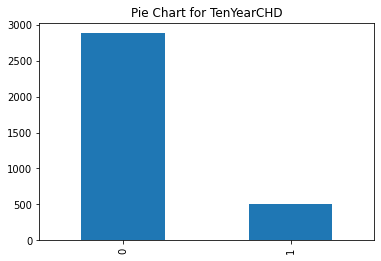

In [20]:
#To get the pie Plot to analyze TenYearCHD
cardio_df["TenYearCHD"].value_counts().plot(kind="bar")
plt.title('Pie Chart for TenYearCHD')
plt.show()

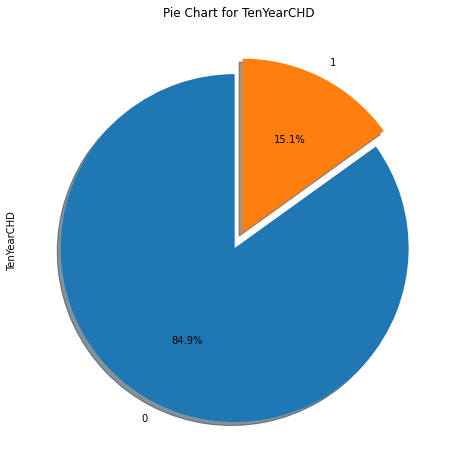

In [21]:
#To get the pie Plot to analyze seasons
cardio_df["TenYearCHD"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for TenYearCHD')
plt.show()

From above analysis of target variabale "TenYearCHD" we observed that dataset is biased we need to carefully deal with biased dataset

In [22]:
#renaming the TenYearCHD target feature
cardio_df.rename(columns={"TenYearCHD":"cardio_risk"},inplace=True)

In [23]:
### Univarient analysis  of continuous variables
cardio_numerics_col = cardio_df.select_dtypes(include=np.number).columns.tolist()
print("numerical columns \n")
print(cardio_numerics_col)


numerical columns 

['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cardio_risk']




### 1. Sex

In [24]:
cardio_df["sex"].value_counts()

1    1923
0    1467
Name: sex, dtype: int64

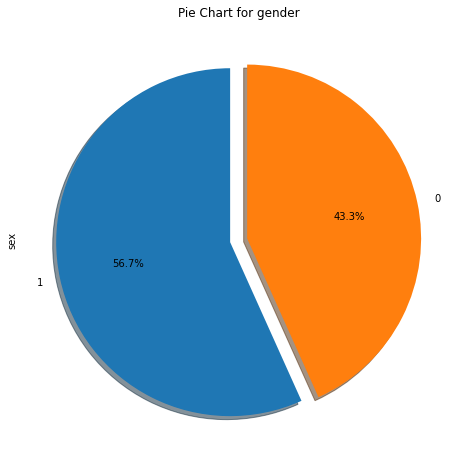

In [25]:
cardio_df["sex"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for gender')
plt.show()

The dataset contain 43.3% of male data and remaining data belongs to female 

In [26]:
cardio_df.groupby(["sex","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk,0,1
sex,,
0,1195,272
1,1684,239


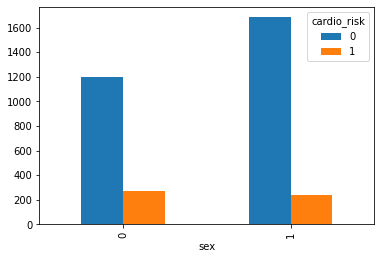

In [27]:
# plotting graph for checking how many users are male or female and how it affects the target variable

pd.crosstab(cardio_df['sex'],cardio_df['cardio_risk']).plot(kind='bar')

In cimparison with male female less likely  to get cardiovascular risk

### 2. 'is_smoking'

In [28]:
cardio_df["is_smoking"].value_counts()

0    1703
1    1687
Name: is_smoking, dtype: int64

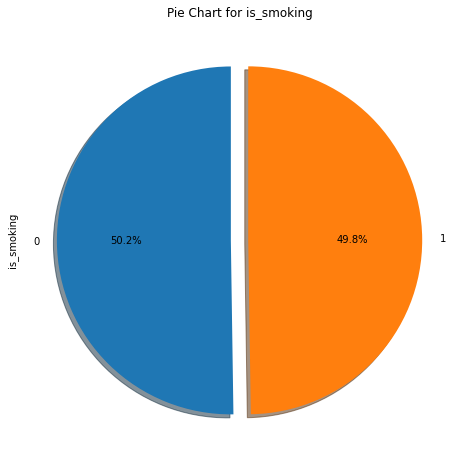

In [29]:
cardio_df["is_smoking"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for is_smoking')
plt.show()

The data set contains almost same no of smokers and non smokers

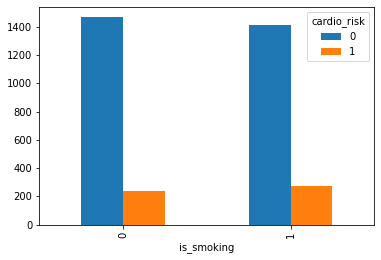

In [30]:
# plotting graph for checking how many users are smoking or not and how it affects the target variable

pd.crosstab(cardio_df['is_smoking'],cardio_df['cardio_risk']).plot(kind='bar')

### Based on studies the smokers are 2 to 4 times more likely to get heart disease than nonsmokers.


**Based on analysis cardiovascular risk dataset,we observed that the smoking slightly more  effective for cardiovascular risk then non smoker.**

In [31]:
cardio_df.groupby(["sex","is_smoking","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk        0    1
sex is_smoking           
0   0            467   89
    1            728  183
1   0           1000  147
    1            684   92

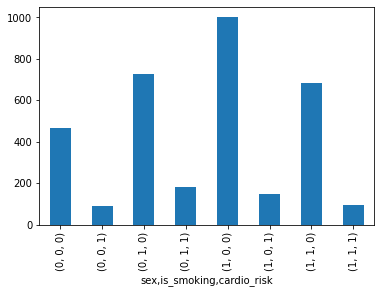

In [32]:
cardio_df.groupby(["sex","is_smoking","cardio_risk"])["cardio_risk"].count().plot(kind='bar')

here we can observe that male who smoke has higher risk of having cardiovascular risk than female who smoke.

### cigsPerDay

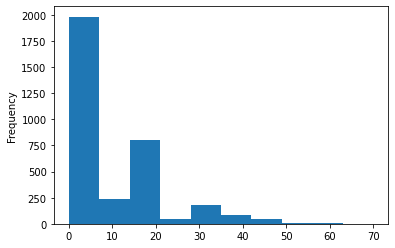

In [33]:
cardio_df["cigsPerDay"].plot(kind="hist")

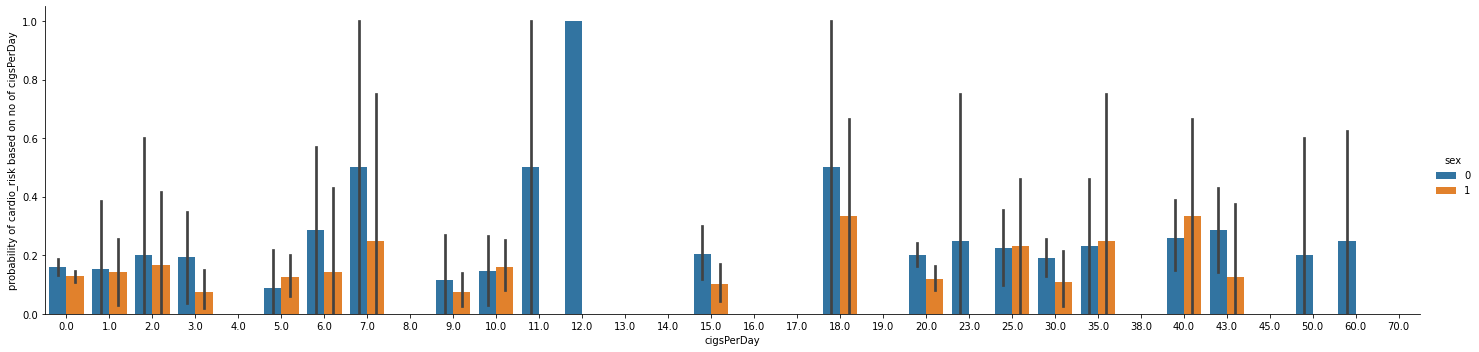

In [34]:
# plotting graph for checking how no of cigrates per day used by person and how it affects the cardio_risk variable

g=sns.factorplot('cigsPerDay','cardio_risk',kind='bar',
                    data=cardio_df,hue='sex',aspect=4)

g=g.set_ylabels("probability of cardio_risk based on no of cigsPerDay")

As we observed that people who don't smoke or use cigsperday less than 6  has less chance having risk of cardiovascular problem.
But as no of cigsperday increases the cardiovascular risk also increase in males. females have less chance of in comparison with male.

### age

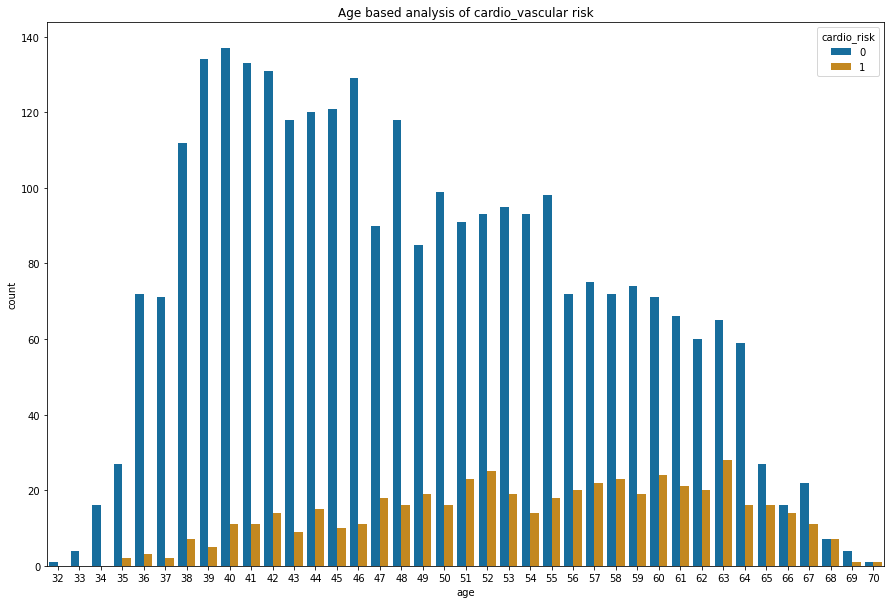

In [35]:
# analyzing cardio_vascular risk over age 
plt.figure(figsize=[15,10])
plt.title("Age based analysis of cardio_vascular risk")
sns.countplot(x='age', hue='cardio_risk', data=cardio_df, palette='colorblind')


[Text(0.5, 1.0, ' Distribution cardio_risk over age and cigsPerDay ')]

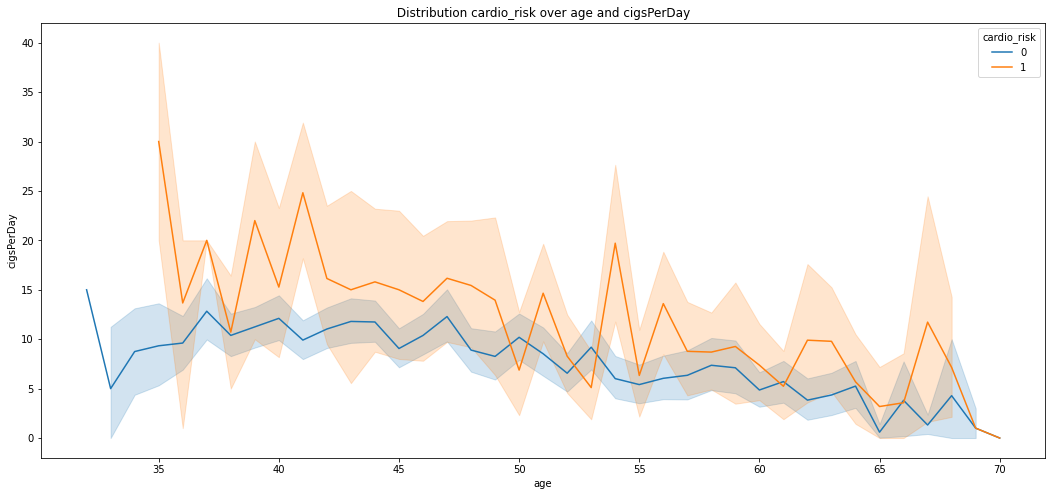

In [36]:
#plotting line plot for understanding distribution cardio_risk over age and cigsPerDay
fig,ax=plt.subplots(figsize=(18,8))
sns.lineplot(data=cardio_df,x='age',y='cigsPerDay',hue='cardio_risk',ax=ax)
ax.set(title=' Distribution cardio_risk over age and cigsPerDay ')

we observed that the Number of people with cardiovascular disease  risk lesser than the number of people withhout cardiovascular disease risk.But people with age greater than the 40 has higher chance of having cardiovascular risk.

Age may matter for having higher chance but if the no. of cigrates per day decreases chance of having higher cardio_risk problem decreases.

lets convert the age feature into bins

In [37]:
#perform data binning on points variable with specific quantiles and labels
bins = [30, 40, 50, 60, 70]
labels = ["30-40age","40-50age","50-60age","60-70age"]
cardio_df['binned_age'] = pd.cut(cardio_df['age'], bins=bins, labels=labels)
cardio_df.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,cardio_risk,binned_age
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,28.06,90.0,80.0,1,60-70age
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,30-40age
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,40-50age
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,40-50age
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,60-70age


In [38]:
cardio_df['binned_age'] .value_counts()

40-50age    1283
50-60age    1041
30-40age     604
60-70age     462
Name: binned_age, dtype: int64

In [39]:
cardio_df.groupby(["binned_age","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk,0,1
binned_age,,
30-40age,574,30
40-50age,1144,139
50-60age,834,207
60-70age,327,135


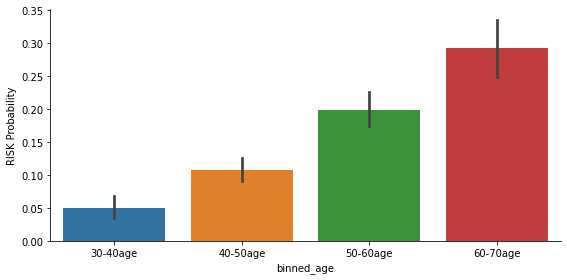

In [40]:
# analyzing cardio_vascular risk over age 
ax=sns.factorplot('binned_age','cardio_risk',kind='bar', data=cardio_df,size=4,aspect=2)
ax=ax.set_ylabels("RISK Probability")


we observed from above analysis that people with age greater than 50 has higher chance of getting cardiovascular disease. 

In [41]:
cardio_df.groupby(["binned_age","sex","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk       0    1
binned_age sex          
30-40age   0    262   17
           1    312   13
40-50age   0    483   81
           1    661   58
50-60age   0    331  108
           1    503   99
60-70age   0    119   66
           1    208   69

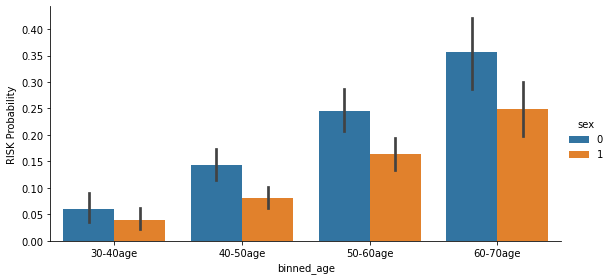

In [42]:
# analyzing cardio_vascular risk over age 
ax=sns.factorplot('binned_age','cardio_risk',kind='bar',hue="sex", data=cardio_df,size=4,aspect=2)
ax=ax.set_ylabels("RISK Probability")

Based on our observation, as people get older the risk of getting cardiovascular disease iis high male in comarison with female.

### Education


In [43]:
cardio_df["education"].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

we observed that the people who completed their eduction level 1 is higher incount, than people who completed level 2(intermediate) or level 3(graduates) or level 4(post graduate)

Text(0, 0.5, 'count')

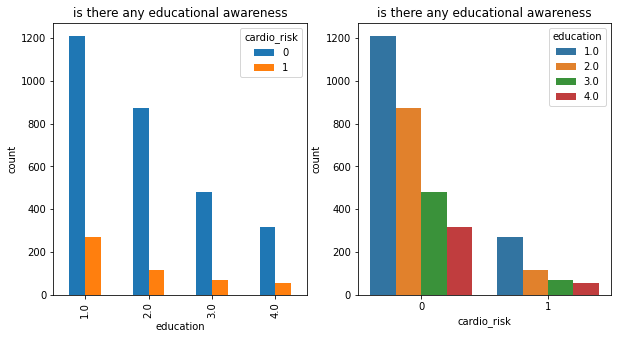

In [44]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(10,5)) 
cardio_df.groupby(["education","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk').plot(kind="bar",ax=ax[0])
ax[0].set_title('is there any educational awareness')
ax[0].set_ylabel('count')
# count plot of education levels people having diseases
sns.countplot(x ='cardio_risk', hue ='education', data = cardio_df,ax=ax[1])
ax[1].set_title('is there any educational awareness')
ax[1].set_ylabel('count')



Education of people not much effective in creating awareness to reduce cardio vascular risk.so we can drop this .



###'BPMeds' 
 we can say that people with blood pressure medication

In [45]:
cardio_df["BPMeds"].value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

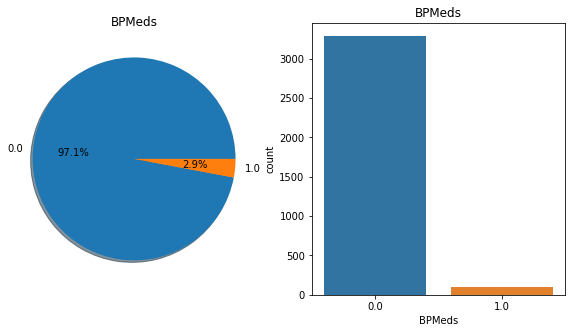

In [46]:
#Plotting pie chart of BPMeds variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['BPMeds'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('BPMeds')
ax[0].set_ylabel('')
sns.countplot('BPMeds',data=cardio_df,ax=ax[1])
ax[1].set_title('BPMeds')
plt.show()


In [47]:
cardio_df.groupby(["BPMeds","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk,0,1
BPMeds,,
0.0,2812,478
1.0,67,33


Text(0.5, 1.0, 'BPMeds')

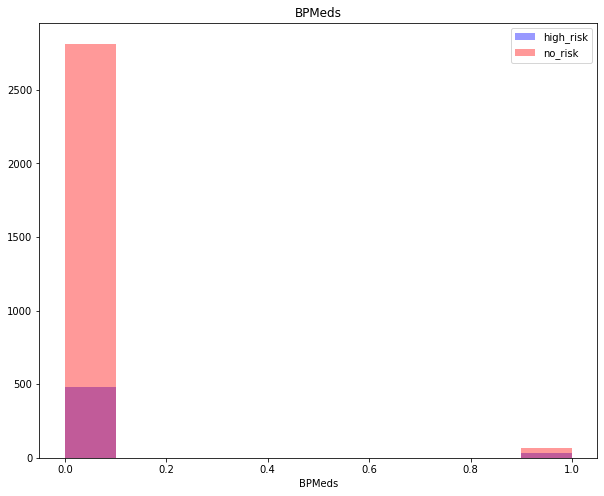

In [48]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].BPMeds,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].BPMeds,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('BPMeds')

#### People who is under madication has nearly 50%  chance of getting cardiovascular disease

### **PrevalentStroke**

It deal with  whether or not the patient had previously had a stroke

In [49]:
cardio_df["prevalentStroke"].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

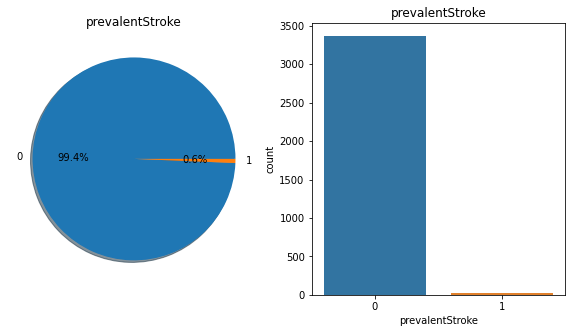

In [50]:
#Plotting pie chart of prevalentStroke variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['prevalentStroke'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('prevalentStroke')
ax[0].set_ylabel('')
sns.countplot('prevalentStroke',data=cardio_df,ax=ax[1])
ax[1].set_title('prevalentStroke')
plt.show()


In [51]:
cardio_df.groupby(["prevalentStroke","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk,0,1
prevalentStroke,,
0,2867,501
1,12,10


Text(0.5, 1.0, 'prevalentStroke')

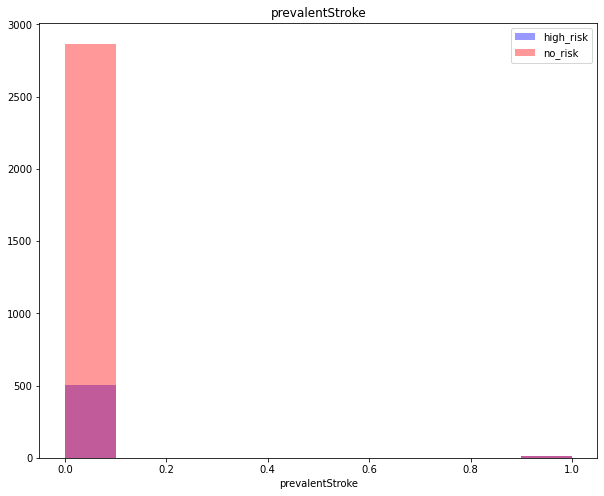

In [52]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].prevalentStroke,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].prevalentStroke,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('prevalentStroke')

Even if patient has got stroke earlier there is 40-50% chance getting cardiovascular disease risk. 
# we can drop this feature

### PrevalentHyp

In [53]:
cardio_df["prevalentHyp"].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

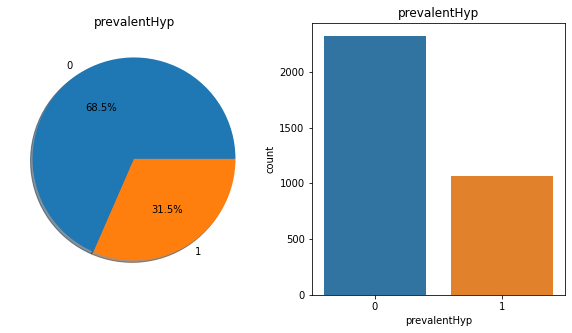

In [54]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['prevalentHyp'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('prevalentHyp')
ax[0].set_ylabel('')
sns.countplot('prevalentHyp',data=cardio_df,ax=ax[1])
ax[1].set_title('prevalentHyp')
plt.show()

In [55]:
cardio_df.groupby(["prevalentHyp","cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk,0,1
prevalentHyp,,
0,2065,256
1,814,255


Text(0.5, 1.0, 'prevalentHyp')

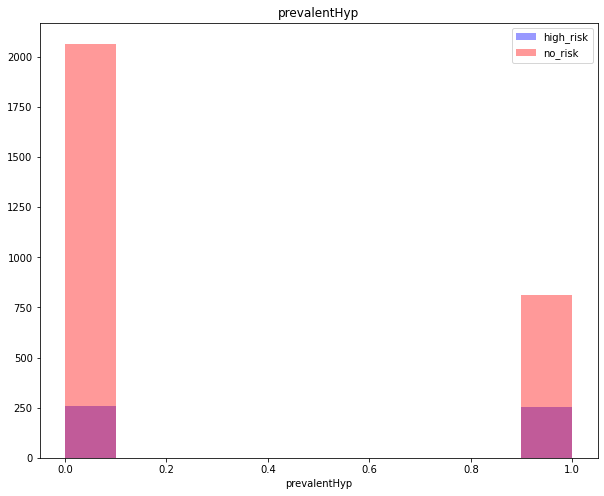

In [56]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].prevalentHyp,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].prevalentHyp,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('prevalentHyp')

## 'diabetes'

In [57]:
cardio_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

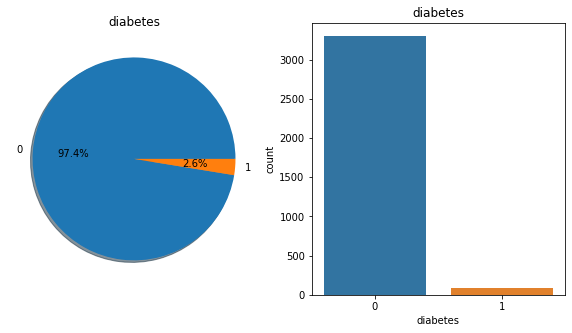

In [58]:
#Plotting pie chart of target variable
f,ax=plt.subplots(1,2,figsize=(10,5))
cardio_df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('diabetes')
ax[0].set_ylabel('')
sns.countplot('diabetes',data=cardio_df,ax=ax[1])
ax[1].set_title('diabetes')
plt.show()

In [59]:
cardio_df.groupby(['diabetes',"cardio_risk"])["cardio_risk"].count().unstack('cardio_risk')

cardio_risk,0,1
diabetes,,
0,2825,478
1,54,33


Text(0.5, 1.0, 'diabetes')

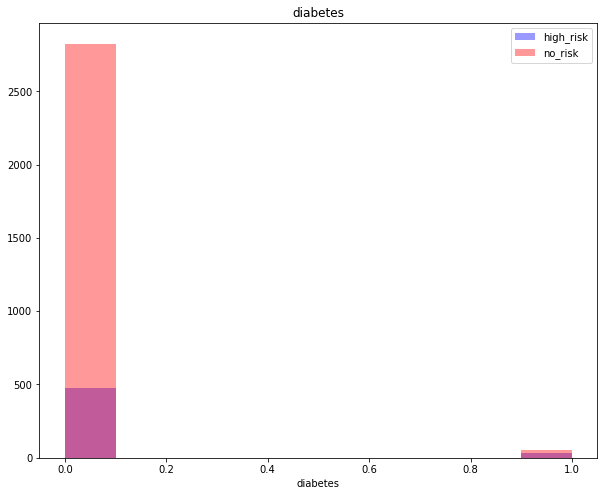

In [60]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].diabetes,bins=10,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].diabetes,bins=10,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('diabetes')

### totChol

In [61]:
cardio_df['totChol'].value_counts()

240.0    66
210.0    53
220.0    48
260.0    47
232.0    45
         ..
331.0     1
137.0     1
392.0     1
353.0     1
364.0     1
Name: totChol, Length: 240, dtype: int64

Text(0.5, 1.0, 'totChol')

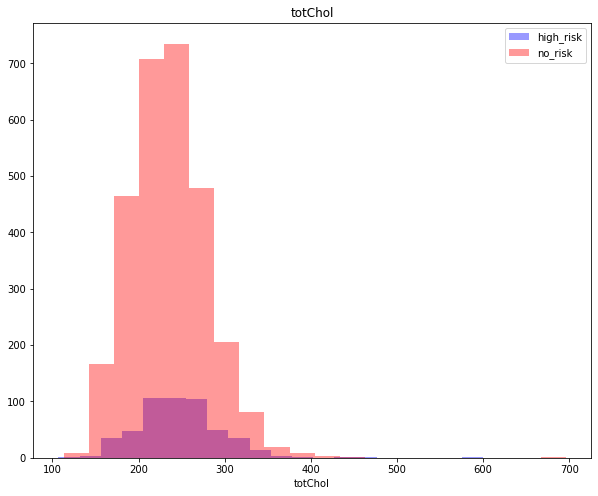

In [62]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].totChol,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].totChol,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('totChol')

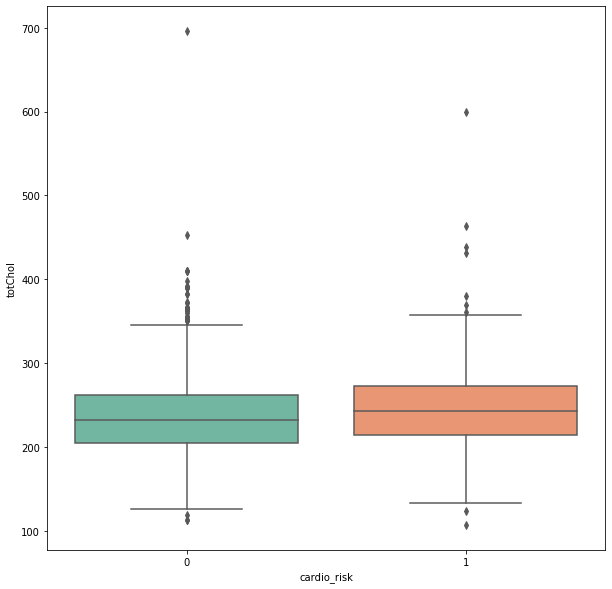

In [63]:
#plotting the box plot to vizualize the data distribution of cardio_risk and totChol
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="totChol", data=cardio_df,palette="Set2")

### BMI

In [64]:
cardio_df['BMI'].value_counts()

22.91    17
22.54    16
22.19    15
25.09    12
23.48    12
         ..
19.25     1
30.71     1
36.65     1
31.18     1
31.09     1
Name: BMI, Length: 1259, dtype: int64

Text(0.5, 1.0, 'BMI')

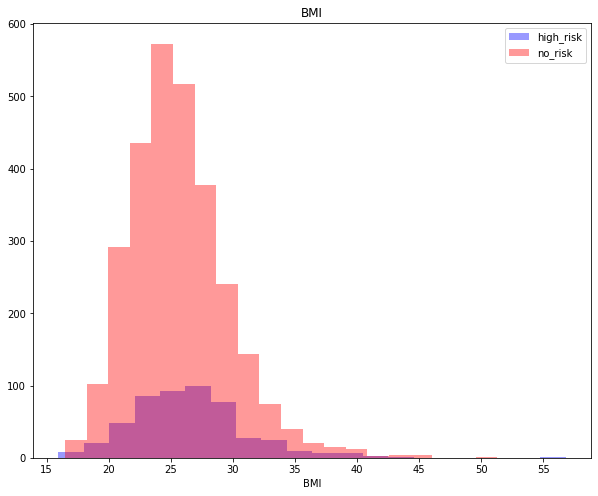

In [65]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].BMI,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].BMI,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('BMI')


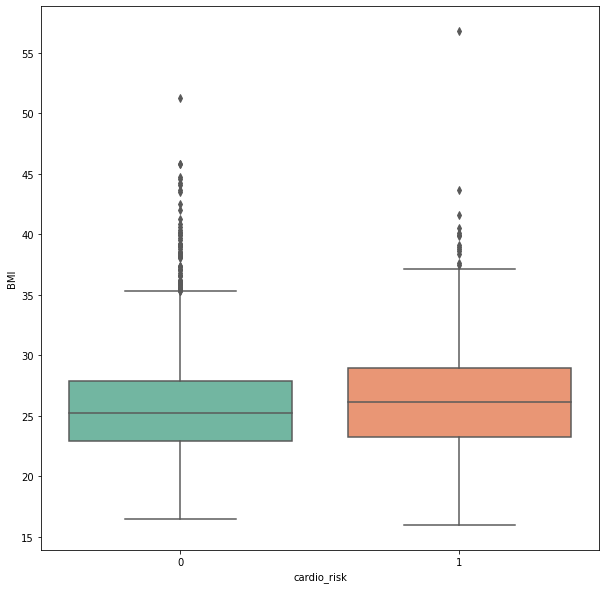

In [66]:
#plotting the box plot to vizualize the data distribution of cardio_risk and BMI
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="BMI", data=cardio_df,palette="Set2")

### HeartRate

In [67]:
cardio_df['heartRate'].value_counts()

75.0     442
80.0     298
70.0     241
85.0     191
72.0     184
        ... 
47.0       1
143.0      1
51.0       1
140.0      1
97.0       1
Name: heartRate, Length: 68, dtype: int64

Text(0.5, 1.0, 'heartRate')

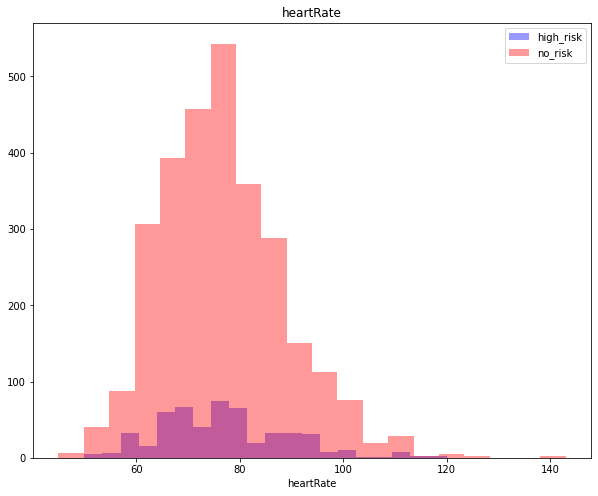

In [68]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].heartRate,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].heartRate,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('heartRate')


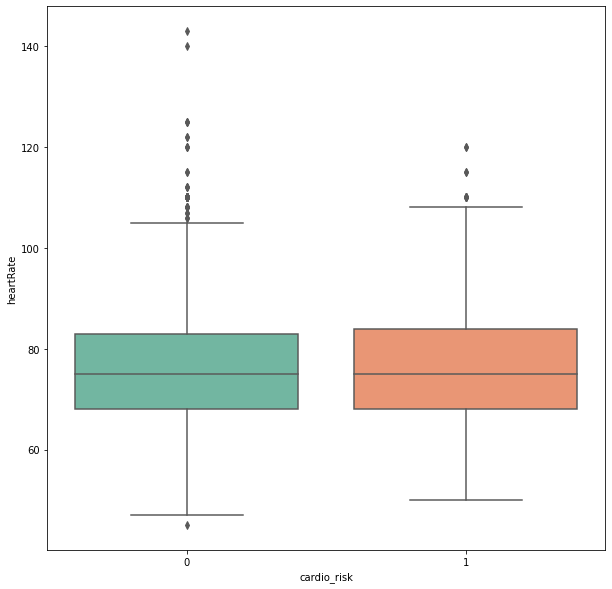

In [69]:
#plotting the box plot to vizualize the data distribution of cardio_risk and heartrate
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="heartRate", data=cardio_df,palette="Set2")

### Glucose

In [70]:
cardio_df['glucose'].value_counts()

75.0     164
83.0     151
70.0     134
77.0     131
85.0     130
        ... 
191.0      1
244.0      1
256.0      1
145.0      1
274.0      1
Name: glucose, Length: 132, dtype: int64

Text(0.5, 1.0, 'glucose')

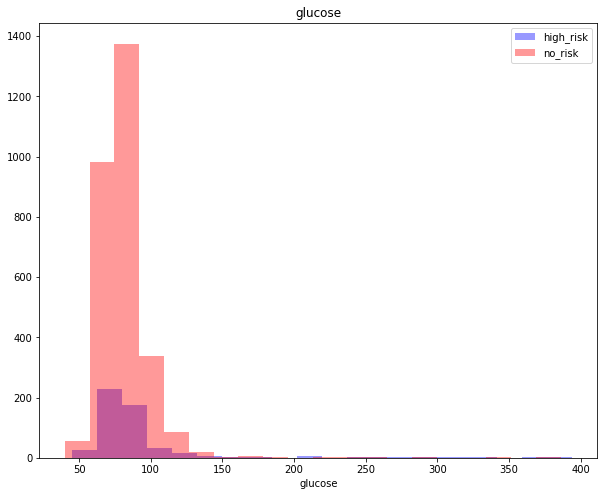

In [71]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].glucose,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].glucose,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('glucose')


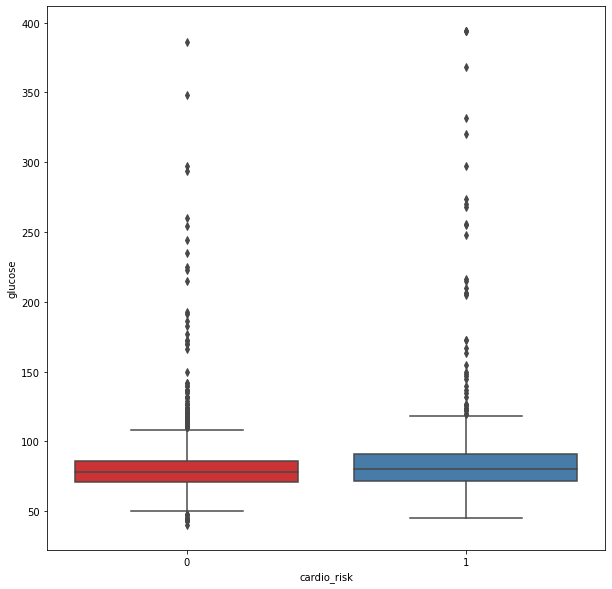

In [72]:
#plotting the box plot to vizualize the data distribution of cardio_risk and glucose
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="glucose", data=cardio_df,palette="Set1")

### sysBP

In [73]:
cardio_df['sysBP'].value_counts()

110.0    87
120.0    85
130.0    85
125.0    69
115.0    68
         ..
214.0     1
188.5     1
230.0     1
169.5     1
85.5      1
Name: sysBP, Length: 226, dtype: int64

Text(0.5, 1.0, 'sysBP')

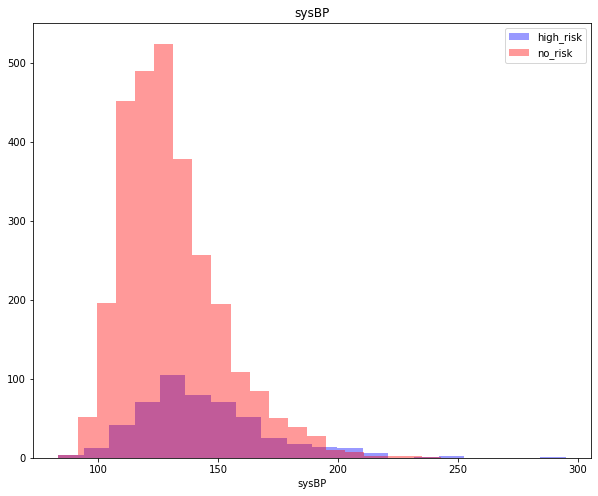

In [74]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].sysBP,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].sysBP,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('sysBP')

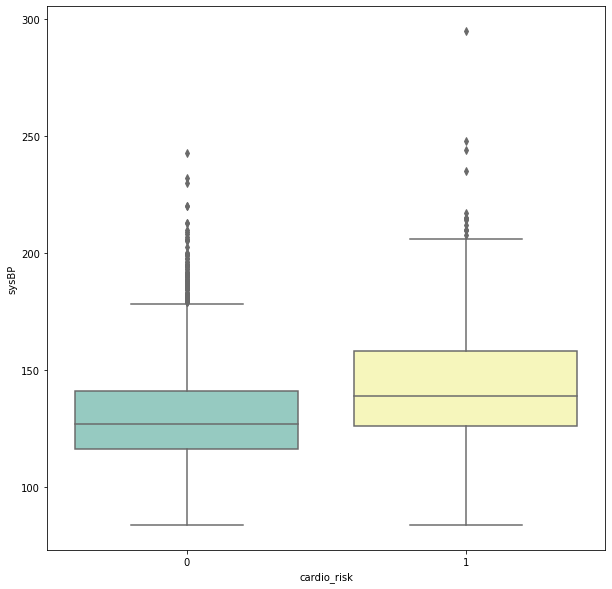

In [75]:
#plotting the box plot to vizualize the data distribution of cardio_risk and sysBP
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="sysBP", data=cardio_df,palette="Set3")

### diaBP

In [76]:
cardio_df['diaBP'].value_counts()

80.0     213
82.0     123
70.0     109
85.0     107
90.0     100
        ... 
48.0       1
60.5       1
129.0      1
115.5      1
51.0       1
Name: diaBP, Length: 142, dtype: int64

Text(0.5, 1.0, 'diaBP')

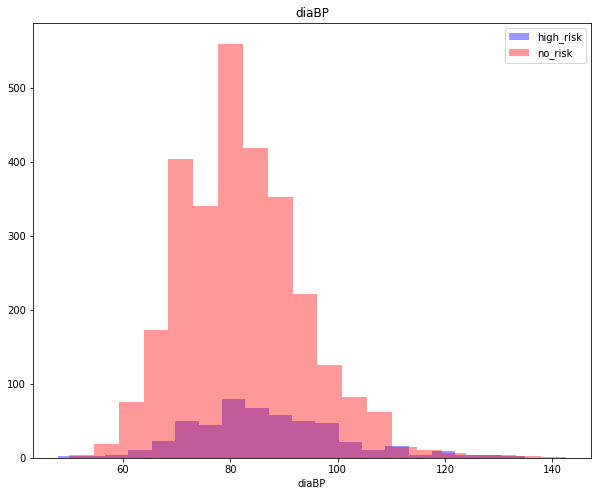

In [77]:
plt.figure(figsize=(10,8))
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==1].diaBP,bins=20,label="high_risk",color='b',kde=False)
ax=sns.distplot(cardio_df[cardio_df['cardio_risk']==0].diaBP,bins=20,label="no_risk",color='r',kde=False)
ax.legend()
ax.set_title('diaBP')

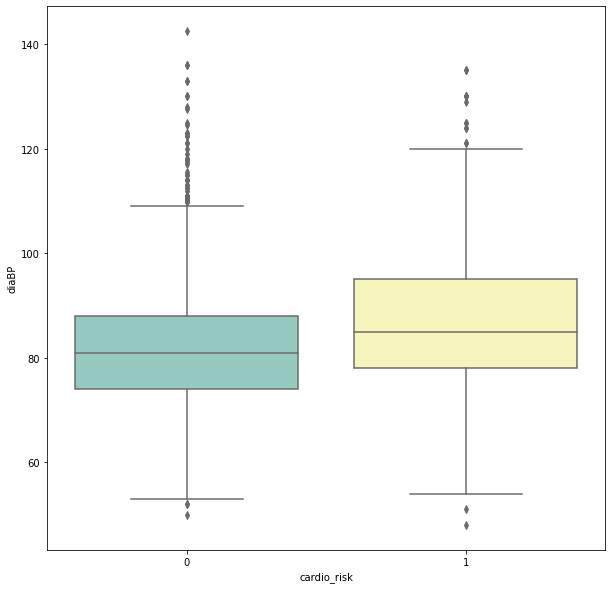

In [78]:
#plotting the box plot to vizualize the data distribution of cardio_risk and diaBP
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="cardio_risk", y="diaBP", data=cardio_df,palette="Set3")

In [79]:
#droping columns which doesnot add value to following process
cardio_df.drop(columns=["age","id"],axis=1,inplace=True)

### Outlier/Anamoly detection

In [80]:
### Univarient analysis  of continuous variables
# Lets check the discrete and continuous features
categorical_features = [i for i in cardio_df.columns if cardio_df[i].nunique()<=10]
continuous_features = [i for i in cardio_df.columns if i not in categorical_features and i!="id"]
print("continuous feature columns \n")
print(continuous_features)


continuous feature columns 

['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


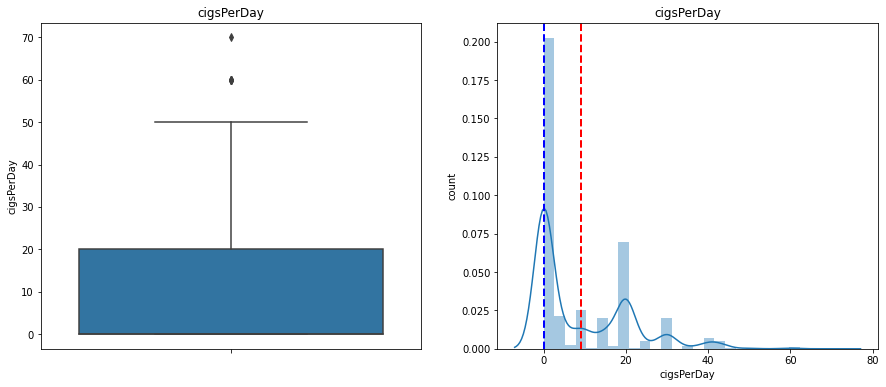

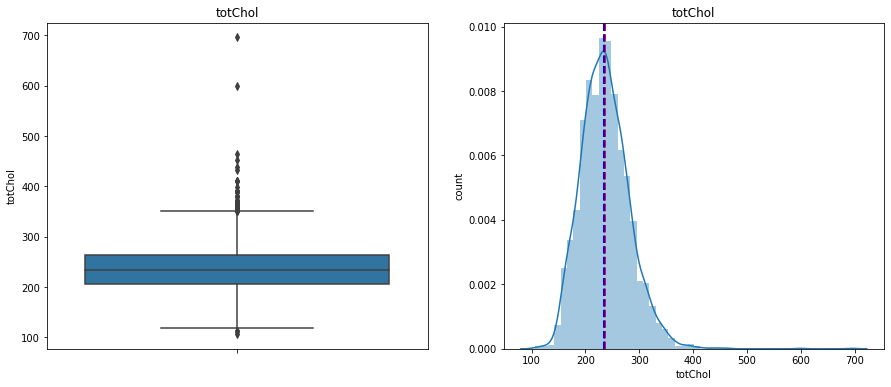

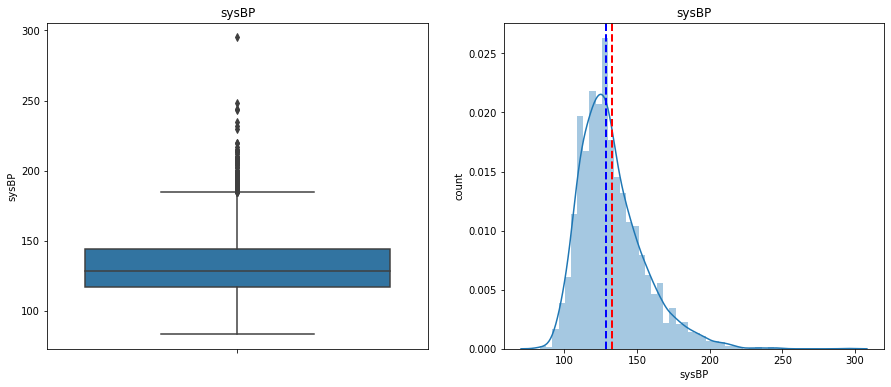

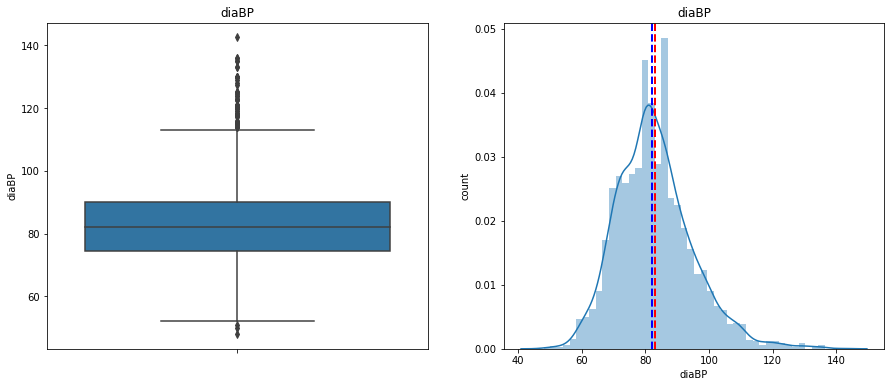

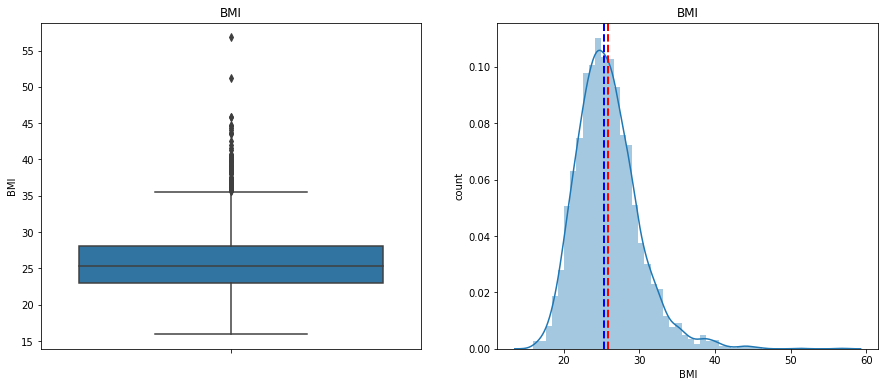

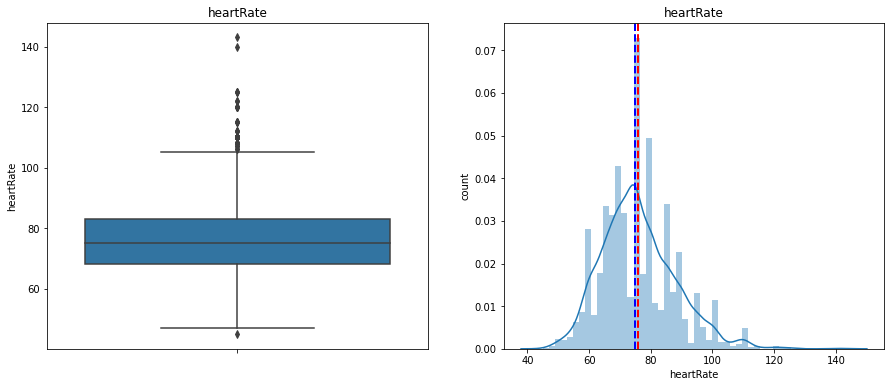

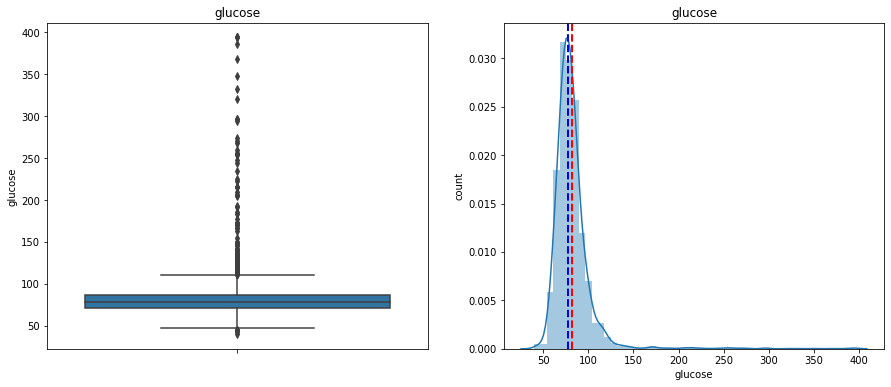

In [81]:
#ploting boxplot and distplot to check data distribution of each numerical column
for var in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=cardio_df[var])
    fig.set_title(var)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(cardio_df[var])
    plt.axvline(cardio_df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(cardio_df[var].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(var)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

In [82]:
#checking skewness of each feature
print("skewness of the numerical column distribution is as follows:\n")
for var in continuous_features:
     print(f'{var} has skewness ...........  {round(cardio_df[var].skew(),3)}')

skewness of the numerical column distribution is as follows:

cigsPerDay has skewness ...........  1.221
totChol has skewness ...........  0.927
sysBP has skewness ...........  1.176
diaBP has skewness ...........  0.718
BMI has skewness ...........  1.027
heartRate has skewness ...........  0.676
glucose has skewness ...........  6.258


here we observed that the glucose feature suffer from skewness i.e that occured due to precence of outliers. But we cannot drop these outlier because some people may has got high level of glucose  this may increase their cardiovascular problem.

feature with outliers:

In [83]:
feature_with_outlier=["BMI","heartRate","glucose","diaBP","sysBP","totChol","cigsPerDay"]

In [84]:
# Removing outliers by standard methods and Plotting graphs:
for col in feature_with_outlier:
  # Using IQR method to define the range of inliners:
  q1, q3, median = cardio_df[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value
  cardio_df[col] = np.where(cardio_df[col] > upper_limit, median,np.where(cardio_df[col] < lower_limit,median,cardio_df[col]))

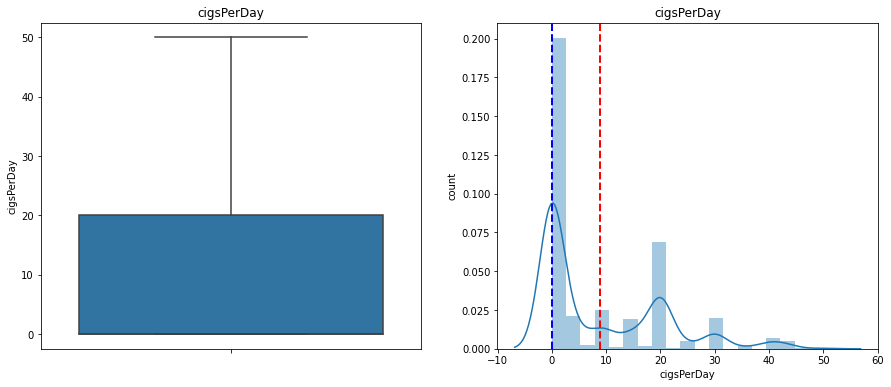

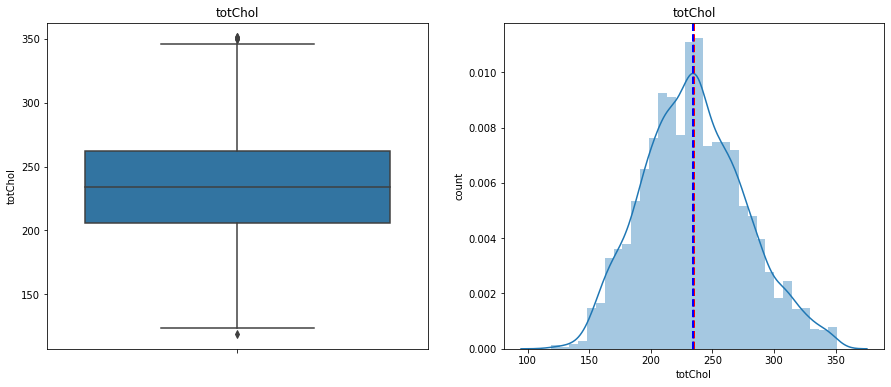

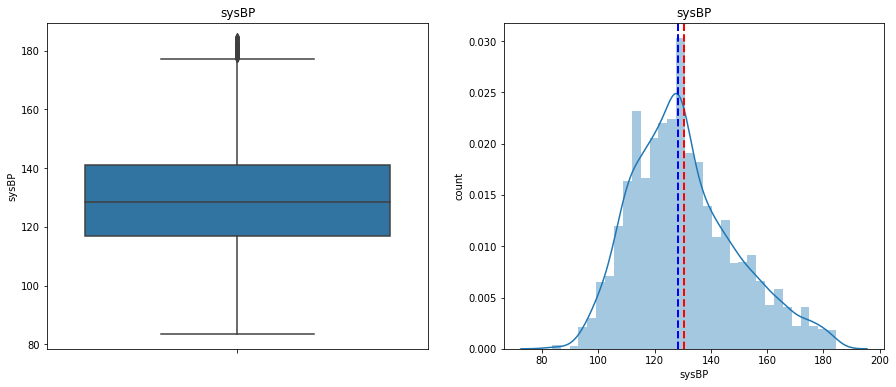

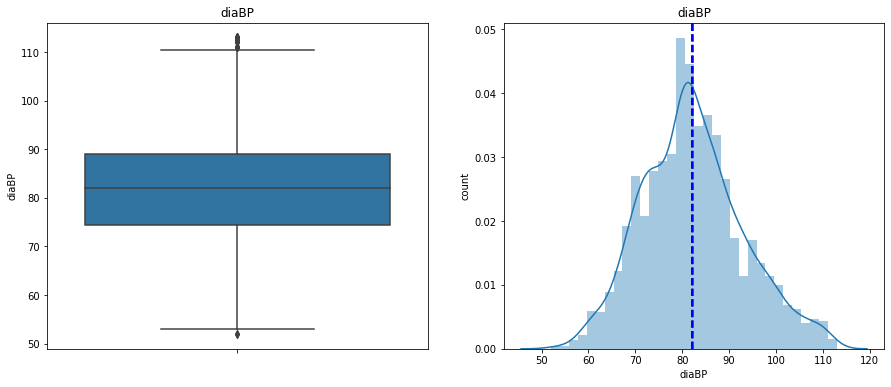

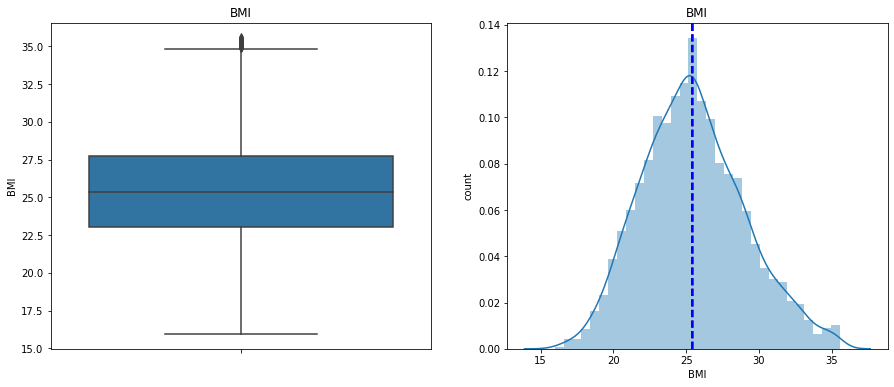

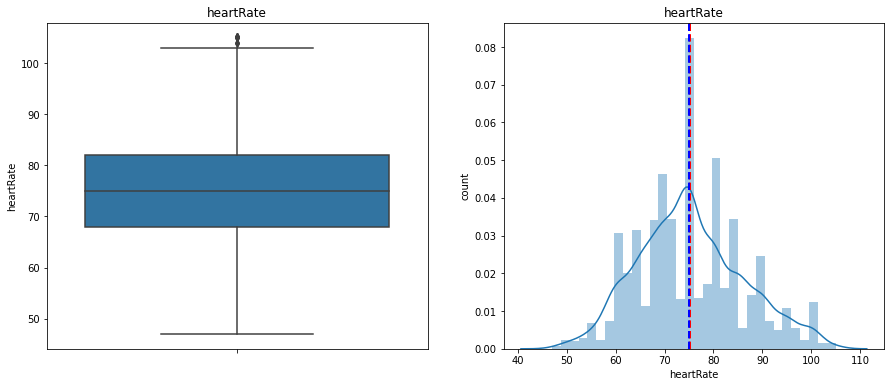

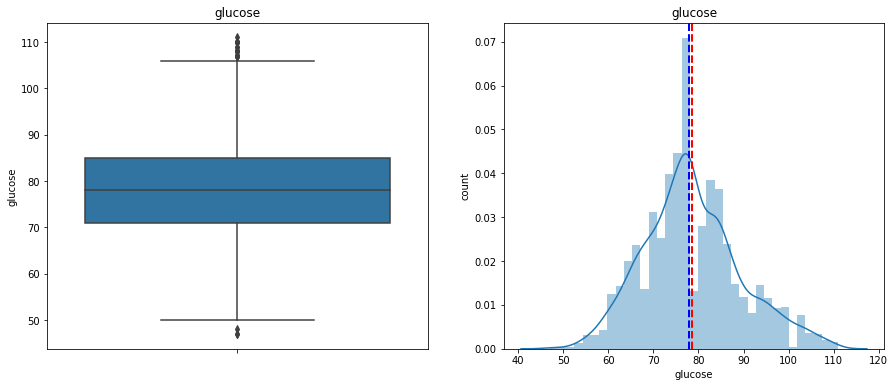

In [85]:
#ploting boxplot and distplot to check data distribution of each numerical column after outlier treatment
for var in continuous_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=cardio_df[var])
    fig.set_title(var)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(cardio_df[var])
    plt.axvline(cardio_df[var].mean(), color='red', linestyle='dashed', linewidth=2)
    plt.axvline(cardio_df[var].median(), color='blue', linestyle='dashed', linewidth=2)
    fig.set_title(var)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

    plt.show()

In [86]:
#checking skewness of each feature after outlier treatment
print("skewness of the numerical column distribution is as follows:\n")
for var in continuous_features:
     print(f'{var} has skewness ...........  {round(cardio_df[var].skew(),3)}')

skewness of the numerical column distribution is as follows:

cigsPerDay has skewness ...........  1.116
totChol has skewness ...........  0.238
sysBP has skewness ...........  0.59
diaBP has skewness ...........  0.3
BMI has skewness ...........  0.294
heartRate has skewness ...........  0.288
glucose has skewness ...........  0.365


checking multicolinearity between all independent feature and target variable

1.Using pair plot

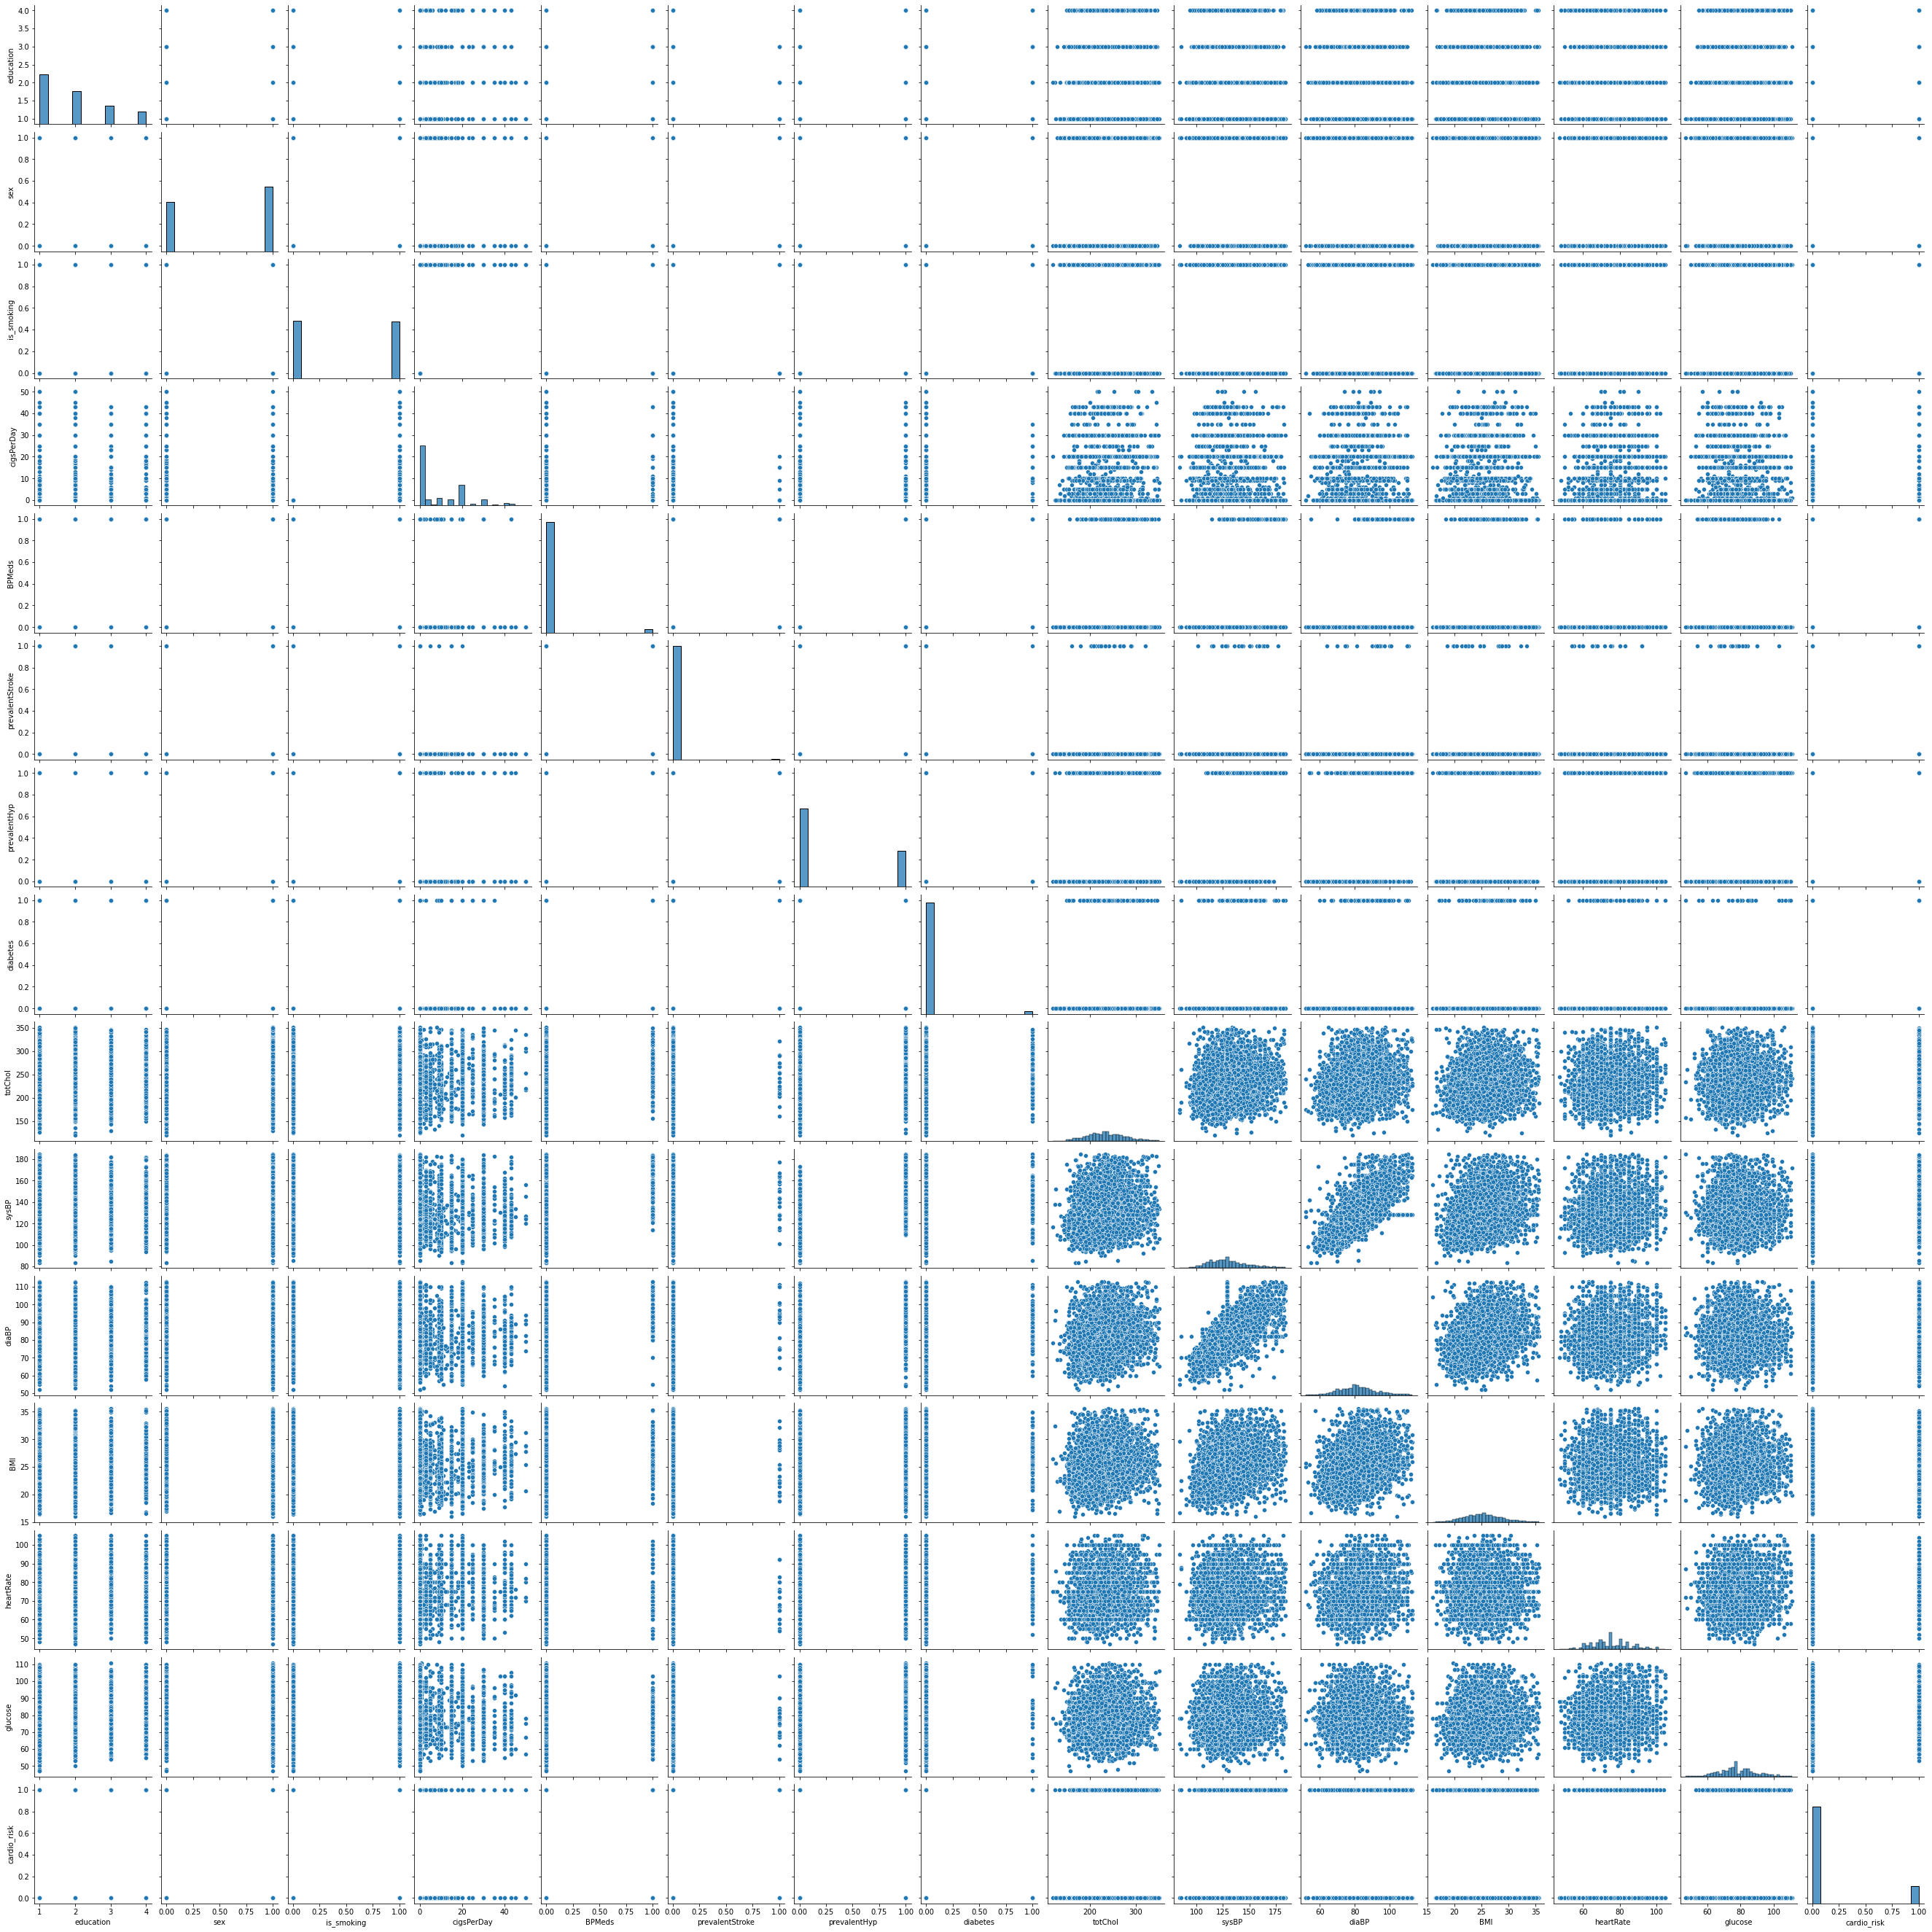

In [87]:
#pairplot
sns.pairplot(cardio_df)

## 👉 Converting categorical into numerical columns

In [88]:
# Create dummy variables for the catgeorical variable  shift_timings 
cardio_df['30-40age'] = np.where(cardio_df['binned_age']=='30-40age', 1, 0)
cardio_df['40-50age'] = np.where(cardio_df['binned_age']=='40-50age', 1, 0)
cardio_df['50-60age'] = np.where(cardio_df['binned_age']=='50-60age', 1, 0)
cardio_df['60-70age'] = np.where(cardio_df['binned_age']=='60-70age', 1, 0)

# Drop the original column State from the dataframe
cardio_df.drop(columns=["binned_age","education"],axis=1,inplace=True)

2.using correlation metrics

In [89]:
#correlation matrix for each numerical feature using ".corr()"
corr_matrix= round(cardio_df.corr(),3)
corr_matrix

,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,cardio_risk,30-40age,40-50age,50-60age,60-70age
sex,1.000,-0.215,-0.321,0.043,0.011,-0.003,-0.009,0.062,-0.001,-0.078,-0.151,0.116,0.023,-0.085,-0.027,-0.011,0.015,0.026
is_smoking,-0.215,1.000,0.774,-0.038,-0.044,-0.119,-0.053,-0.051,-0.136,-0.123,-0.173,0.071,-0.079,0.034,0.105,0.124,-0.101,-0.156
cigsPerDay,-0.321,0.774,1.000,-0.035,-0.042,-0.085,-0.048,-0.024,-0.090,-0.067,-0.099,0.072,-0.083,0.064,0.085,0.122,-0.094,-0.140
BPMeds,0.043,-0.038,-0.035,1.000,0.116,0.257,0.071,0.079,0.188,0.168,0.065,-0.012,-0.027,0.087,-0.068,-0.046,0.050,0.073
prevalentStroke,0.011,-0.044,-0.042,0.116,1.000,0.072,0.010,0.003,0.054,0.057,-0.006,-0.016,-0.013,0.069,-0.028,-0.040,0.042,0.032
prevalentHyp,-0.003,-0.119,-0.085,0.257,0.072,1.000,0.083,0.146,0.672,0.593,0.255,0.130,0.063,0.167,-0.187,-0.130,0.144,0.199
diabetes,-0.009,-0.053,-0.048,0.071,0.010,0.083,1.000,0.043,0.071,0.060,0.054,0.029,0.007,0.104,-0.061,-0.046,0.034,0.088
totChol,0.062,-0.051,-0.024,0.079,0.003,0.146,0.043,1.000,0.182,0.171,0.145,0.071,0.029,0.088,-0.221,-0.082,0.187,0.111
sysBP,-0.001,-0.136,-0.090,0.188,0.054,0.672,0.071,0.182,1.000,0.714,0.278,0.139,0.069,0.166,-0.239,-0.142,0.190,0.213
diaBP,-0.078,-0.123,-0.067,0.168,0.057,0.593,0.060,0.171,0.714,1.000,0.318,0.150,0.031,0.109,-0.176,-0.047,0.141,0.073


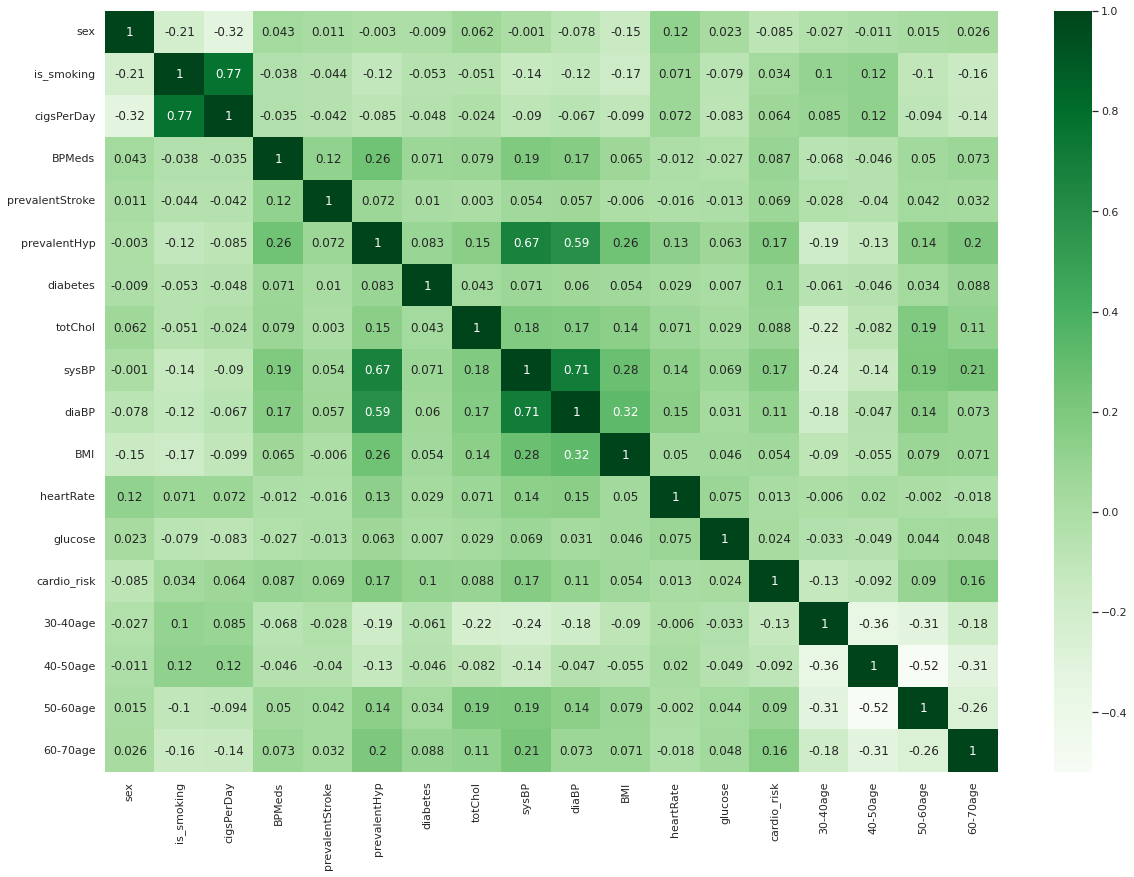

In [90]:
#visualization using heatmap
sns.set(rc={'figure.figsize':(20,14)})
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

In [91]:
# Find out the Fields with high correlation

correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            print(abs(corr_matrix.iloc[i, j]), "--", i, '--', j, '--', colname1, '--', colname2)
            correlated_features.add(colname1)
            correlated_features.add(colname2)

0.774 -- 2 -- 1 -- cigsPerDay -- is_smoking
0.714 -- 9 -- 8 -- diaBP -- sysBP


#### **👉Here we can see that glucose,heartrate are not significantly correlated with cardio risk. so  we can drop these feature.**
### **👉cigsPerDay -- is_smoking  where cigsPerDay- no of cigrates per day and is_smoking - is smoking are highly correlated with each other** 


###**👉"diaBP" and "sysBP" are highly correlated**
where
diaBP is Diastolic Pressure
sysBP is Systolic Pressure


### What is VIF?
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

A rule of thumb for interpreting the variance inflation factor:

👉 1 = not correlated.

👉 Between 1 and 5 = moderately correlated.

👉 Greater than 5 = highly correlated.


 from above analysis cigsPerDay and is_smoking is highly correlated with each other and diaBP and  sysBP are also highly correlated with each other

In [92]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [93]:
#applying vif for each feature
calc_vif(cardio_df[[i for i in cardio_df.describe().columns if i not in ["cardio_risk","glucose","heartRate","diaBP","sysBP","40-50age","BMI"]]])

,variables,VIF
0,totChol,6.251558
1,is_smoking,4.964504
2,cigsPerDay,4.252685
3,sex,2.525776
4,50-60age,1.937374
5,prevalentHyp,1.713459
6,60-70age,1.490951
7,30-40age,1.400027
8,BPMeds,1.119773
9,diabetes,1.045656


In [94]:
#correlation matrix for each numerical feature using ".corr()"
corr_matrix= round(cardio_df[[i for i in cardio_df.describe().columns if i not in ["glucose","heartRate","diaBP","sysBP","40-50age","BMI"]]].corr(),3)
corr_matrix

,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,cardio_risk,30-40age,50-60age,60-70age
sex,1.000,-0.215,-0.321,0.043,0.011,-0.003,-0.009,0.062,-0.085,-0.027,0.015,0.026
is_smoking,-0.215,1.000,0.774,-0.038,-0.044,-0.119,-0.053,-0.051,0.034,0.105,-0.101,-0.156
cigsPerDay,-0.321,0.774,1.000,-0.035,-0.042,-0.085,-0.048,-0.024,0.064,0.085,-0.094,-0.140
BPMeds,0.043,-0.038,-0.035,1.000,0.116,0.257,0.071,0.079,0.087,-0.068,0.050,0.073
prevalentStroke,0.011,-0.044,-0.042,0.116,1.000,0.072,0.010,0.003,0.069,-0.028,0.042,0.032
prevalentHyp,-0.003,-0.119,-0.085,0.257,0.072,1.000,0.083,0.146,0.167,-0.187,0.144,0.199
diabetes,-0.009,-0.053,-0.048,0.071,0.010,0.083,1.000,0.043,0.104,-0.061,0.034,0.088
totChol,0.062,-0.051,-0.024,0.079,0.003,0.146,0.043,1.000,0.088,-0.221,0.187,0.111
cardio_risk,-0.085,0.034,0.064,0.087,0.069,0.167,0.104,0.088,1.000,-0.132,0.090,0.157
30-40age,-0.027,0.105,0.085,-0.068,-0.028,-0.187,-0.061,-0.221,-0.132,1.000,-0.310,-0.185


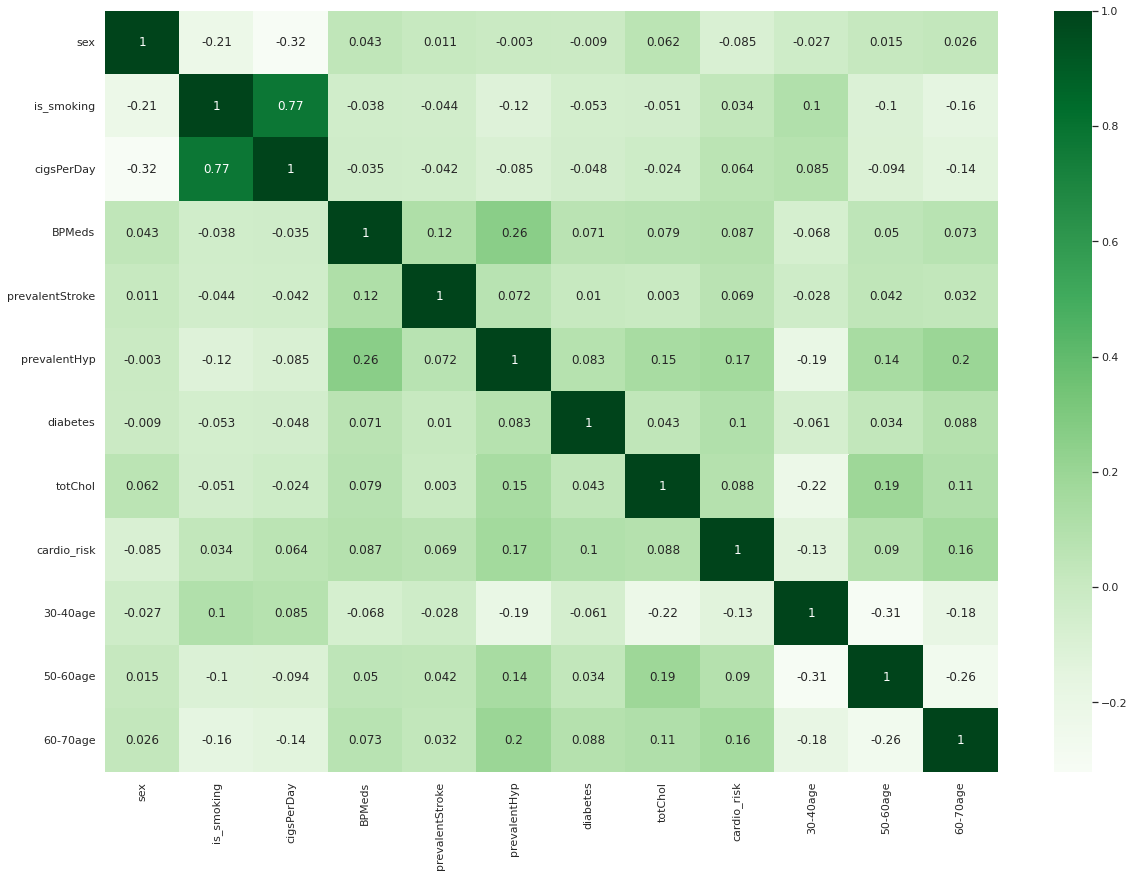

In [95]:
#visualization using heatmap
sns.set(rc={'figure.figsize':(20,14)})
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

In [96]:
#independent feature after removal of multicolliniarity of the data
features=[i for i in cardio_df.describe().columns if i not in ["cardio_risk","glucose","heartRate","diaBP","sysBP","40-50age","BMI"]]
print(features)       

['sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', '30-40age', '50-60age', '60-70age']


#logistic regression 

###Data preprocessing for logistic model


In [97]:
#separating dependent and independent variables

X=cardio_df[features]
y=cardio_df["cardio_risk"]

In [98]:
## Test-Train Split of Input Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=4)
print((X_train.shape,  y_train.shape),(y_test.shape,X_test.shape))

((2712, 11), (2712,)) ((678,), (678, 11))


**What is Standardization?**

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [99]:
#using standardization
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [100]:
#creating dictionary for storing different models accuracy
model_comparison={}

###  Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



In [101]:
# Checking Value counts for both classes Before 
print("Before Handling Class Imbalace:")
y_train.value_counts()

Before Handling Class Imbalace:


0    2291
1     421
Name: cardio_risk, dtype: int64

In [102]:
smote = SMOTE(random_state=42)

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [103]:
# Checking Value counts for both classes After handling Class Imbalance:
print("after  Handling Class Imbalace:")
y_smote.value_counts()

after  Handling Class Imbalace:


0    2291
1    2291
Name: cardio_risk, dtype: int64

## **Building logistic regression model** 

In [104]:
# Fitting Logistic Regression Model
log_reg_clf_model= LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg_clf_model.fit(X_smote,y_smote)
y_pred = log_reg_clf_model.predict(X_test)

### Since dataset is balanced we use accuracy metric

In [107]:
#for train data
print(f"Using logistic regression we get an accuracy of train set{round(((accuracy_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an precision of train set {round(((precision_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an recall score of train set {round(((recall_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an f1 of train set {round(((f1_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")
print(f"Using logistic regression we get an roc_auc_score of train set {round(((roc_auc_score(y_smote, log_reg_clf_model.predict(X_smote))))*100,2)}%")


Using logistic regression we get an accuracy of train set66.0%
Using logistic regression we get an precision of train set 65.54%
Using logistic regression we get an recall score of train set 67.48%
Using logistic regression we get an f1 of train set 66.49%
Using logistic regression we get an roc_auc_score of train set 66.0%


In [108]:

#for test data

print(f"Using logistic regression we get an accuracy of {round((accuracy_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an precision of test set {round((precision_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an recall score of test set {round((recall_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an f1 of test set {round((f1_score(y_test, y_pred))*100,2)}%")
print(f"Using logistic regression we get an roc_auc_score of test set {round((roc_auc_score(y_test, y_pred))*100,2)}%")



Using logistic regression we get an accuracy of 65.78%
Using logistic regression we get an precision of test set 23.31%
Using logistic regression we get an recall score of test set 68.89%
Using logistic regression we get an f1 of test set 34.83%
Using logistic regression we get an roc_auc_score of test set 67.1%


In [115]:
# print classification report
print(classification_report(y_test, y_pred))
report = pd.DataFrame(classification_report(y_pred=y_pred, y_true=y_test, output_dict=True))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77       588
           1       0.23      0.69      0.35        90

    accuracy                           0.66       678
   macro avg       0.58      0.67      0.56       678
weighted avg       0.84      0.66      0.71       678

                    0          1  accuracy   macro avg  weighted avg
precision    0.932039   0.233083  0.657817    0.582561      0.839257
recall       0.653061   0.688889  0.657817    0.670975      0.657817
f1-score     0.768000   0.348315  0.657817    0.558157      0.712290
support    588.000000  90.000000  0.657817  678.000000    678.000000


Text(0.5, 1.0, 'logistic regression Report')

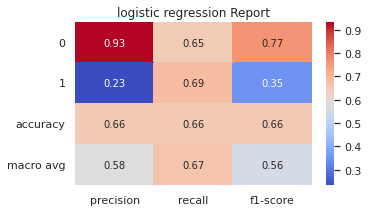

In [117]:
 # Classification report
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
sns.heatmap(report.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title(f'logistic regression Report')

### Feature importance

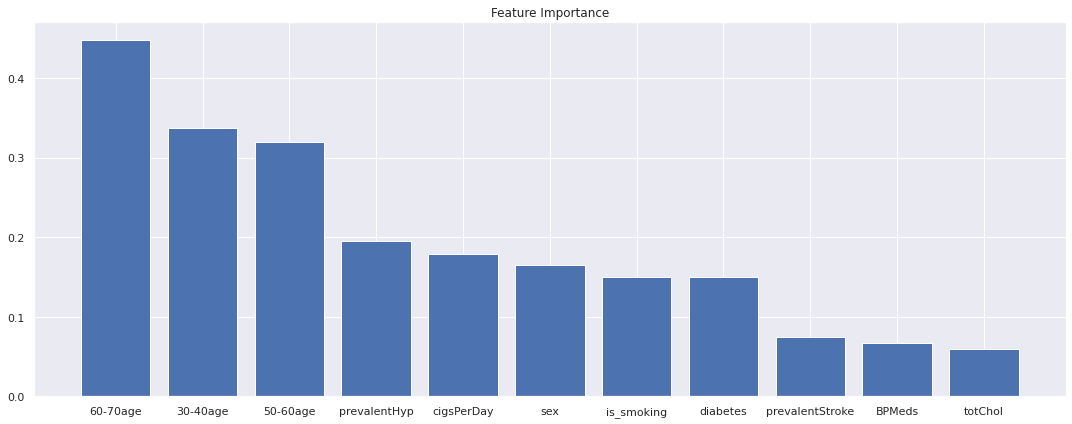

In [120]:
#for feature importance
try:
    importance = log_reg_clf_model.feature_importances_
    feature = features
except:
    importance = np.abs(log_reg_clf_model.coef_[0])
    feature = features
    indices = np.argsort(importance)
    indices = indices[::-1]

plt.figure(figsize=(15,6))
#ploting feature importance
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)), [feature[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()    

## 👉 Data Preprocessing